# Introduction to scikit-learn and classical machine learning for image segmentation and classification

# Let's start by installing all required libraries

In [1]:
!pip install numpy scikit_image scikit_learn matplotlib seaborn pandas tifffile -q

# Classical machine learning based segmentation

## Load the image we want to segment and display it

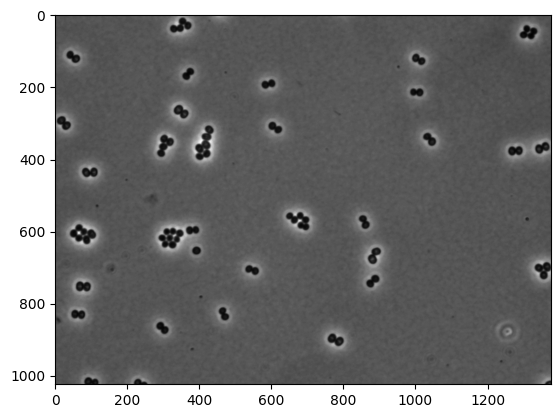

In [2]:
from tifffile import imread
from matplotlib import pyplot as plt

image = imread("../data/images/wt_phase_contrast.tif")
plt.imshow(image, cmap="gray")

## Normalize the image to values ranging from 0 to 1

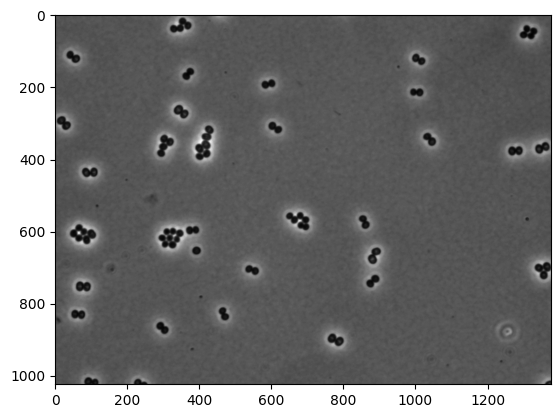

In [3]:
from skimage.exposure import rescale_intensity
image = rescale_intensity(image, out_range="float")
plt.imshow(image, cmap="gray")

## Let's start by trying to segment the image using an unsupervised approach
## k-means clustering

In [4]:
from sklearn.cluster import KMeans

flattened_image = image.reshape((-1, 1))

k = 2 # number of clusters
kmeans = KMeans(n_clusters=2, random_state=100)
kmeans.fit(flattened_image)

segmented_image = kmeans.labels_.reshape(image.shape)

## Let's display the segmented image together with the original image and ground truth mask

(np.float64(-0.5), np.float64(1375.5), np.float64(1023.5), np.float64(-0.5))

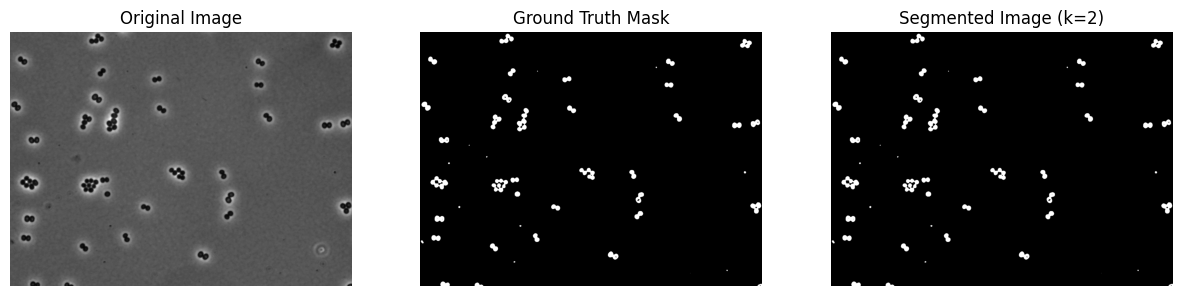

In [5]:
gt_mask = imread("../data/images/wt_mask.tif")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Ground Truth Mask")
plt.imshow(gt_mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f'Segmented Image (k={k})')
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')

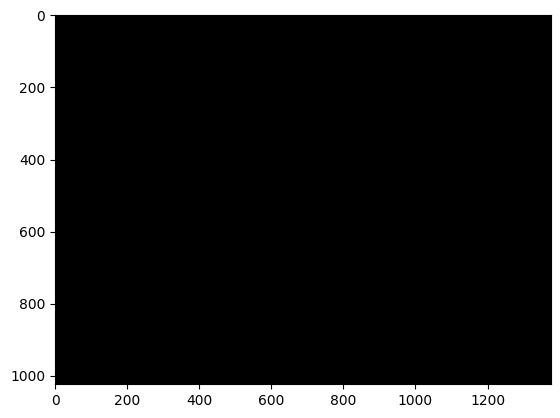

In [6]:
plt.imshow(gt_mask - segmented_image, cmap='gray')